In [2]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Educacion
#Carga de Data
data = pd.read_csv('student_grades.csv')
#Mostrar los datos
print('-----------------------')
print(data.head())
print('-----------------------')
print(data.info())
print('-----------------------')
print(data.describe())

#Separacionm de las variables  independientes X y la independiente Y
X = data.drop('target', axis=1)
y= data['target']

#Dividir el dataset en conjunto de elemento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Estandarizar lo datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Crear el modelo de regresion logistica 

logistic_model = LogisticRegression()

#Entrenar el modelo
logistic_model.fit(x_train_scaled, y_train)

#Realizar oredicciones cin el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

#Crear una matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizar la matris de confision
plt.figure(figsize=8.6)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confision Matrix')
plt.show()

#Imprimir el reporte de clasificacion
print(classification_report(y_test, y_pred))

#Imprimir la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy*100:.2f}%')

-----------------------
   StudentID  MathScore  ReadingScore  WritingScore  Absences
0       4256  83.263227     82.293493     81.898504        18
1       8512  23.882421     35.752738      1.337086        11
2       9429  63.417935     17.187991      0.871921         2
3       8463  95.645696     49.224458     77.689992        13
4       7442  57.471098     46.850233     98.486058        16
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StudentID     2000 non-null   int64  
 1   MathScore     2000 non-null   float64
 2   ReadingScore  2000 non-null   float64
 3   WritingScore  2000 non-null   float64
 4   Absences      2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB
None
-----------------------
         StudentID    MathScore  ReadingScore  WritingScore    Absences
count  2000.000000  2

KeyError: "['target'] not found in axis"

-----------------------
   StudentID  MathScore  ReadingScore  WritingScore  Absences
0       4256  83.263227     82.293493     81.898504        18
1       8512  23.882421     35.752738      1.337086        11
2       9429  63.417935     17.187991      0.871921         2
3       8463  95.645696     49.224458     77.689992        13
4       7442  57.471098     46.850233     98.486058        16
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StudentID     2000 non-null   int64  
 1   MathScore     2000 non-null   float64
 2   ReadingScore  2000 non-null   float64
 3   WritingScore  2000 non-null   float64
 4   Absences      2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB
None
-----------------------
         StudentID    MathScore  ReadingScore  WritingScore    Absences
count  2000.000000  2

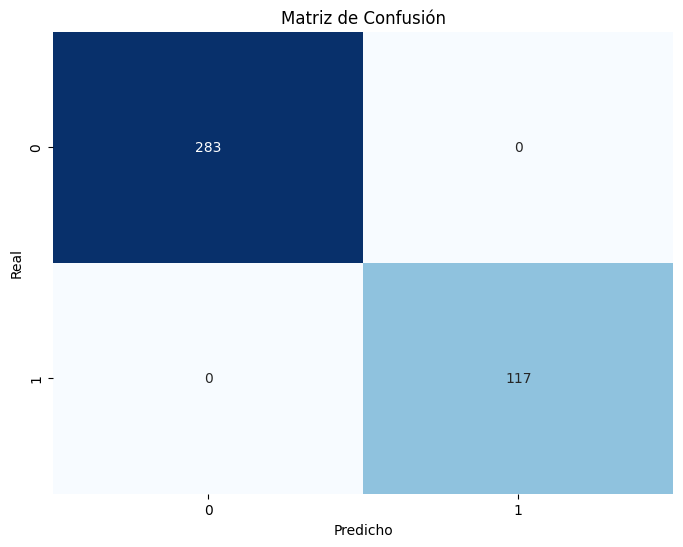

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       117

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Exactitud del modelo: 100.00%


In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar los datos
data = pd.read_csv('student_grades.csv')

# Mostrar los datos
print('-----------------------')
print(data.head())
print('-----------------------')
print(data.info())
print('-----------------------')
print(data.describe())

# Crear una columna 'target' (0: no aprobado, 1: aprobado) basado en el promedio de las calificaciones
data['average_score'] = data[['Absences']].mean(axis=1)
data['target'] = np.where(data['average_score'] <= 5.0, 1, 0)

# Separar las variables independientes X y la variable dependiente Y
X = data.drop(['target', 'average_score', 'StudentID'], axis=1)  # Excluir StudentID y average_score
y = data['target']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Imprimir la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy*100:.2f}%')
